In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US =df_DA_US.dropna(subset= ['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by= 'median',ascending= False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by= 'count', ascending= False).head(10).sort_values(by= 'median',ascending= False)


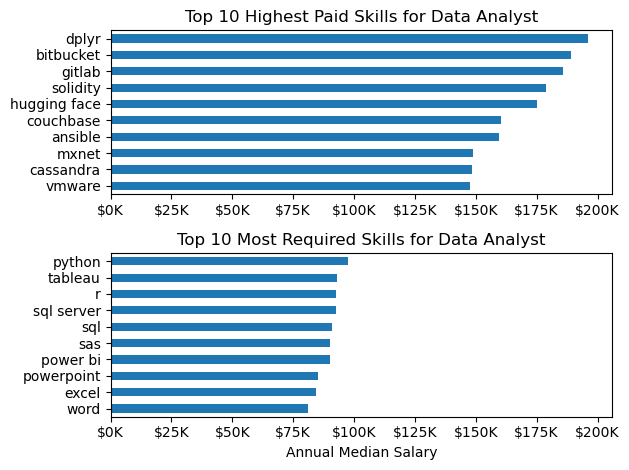

In [5]:
fig,ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind= 'barh', y = 'median', ax= ax[0], legend= False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_skills[::-1].plot(kind= 'barh', y = 'median', ax= ax[1], legend= False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Required Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Annual Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

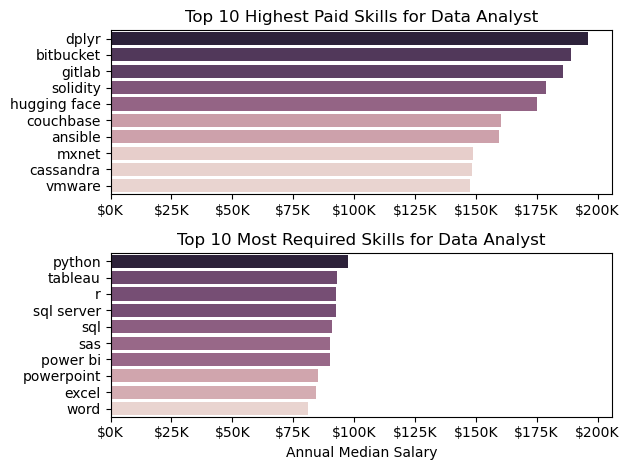

In [6]:
fig,ax = plt.subplots(2,1)

sns.barplot(data= df_DA_top_pay, x='median',y = df_DA_top_pay.index, ax=ax[0], hue='median')
#df_DA_top_pay[::-1].plot(kind= 'barh', y = 'median', ax= ax[0], legend= False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data= df_DA_skills, x='median',y = df_DA_skills.index, ax=ax[1], hue= 'median')
#df_DA_skills[::-1].plot(kind= 'barh', y = 'median', ax= ax[1], legend= False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most Required Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Annual Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()

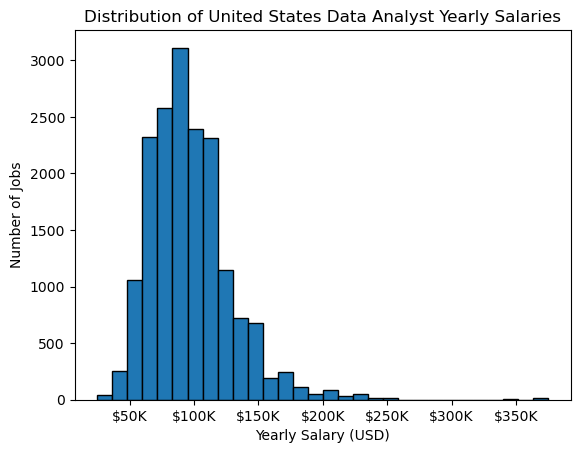

In [7]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

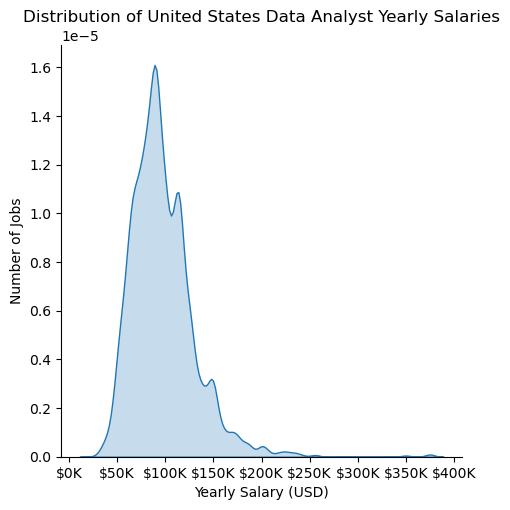

In [8]:
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

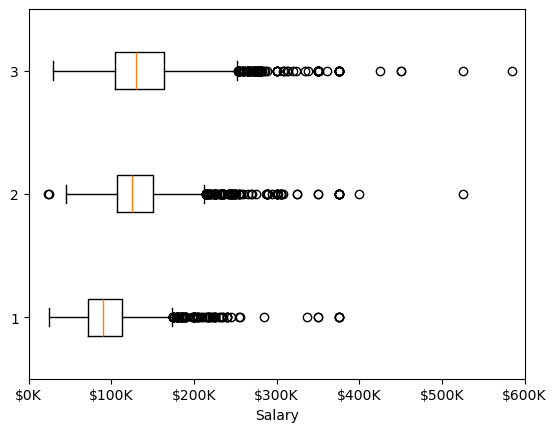

In [9]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list =[df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, label =job_titles, vert=False)
plt.xlabel('Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

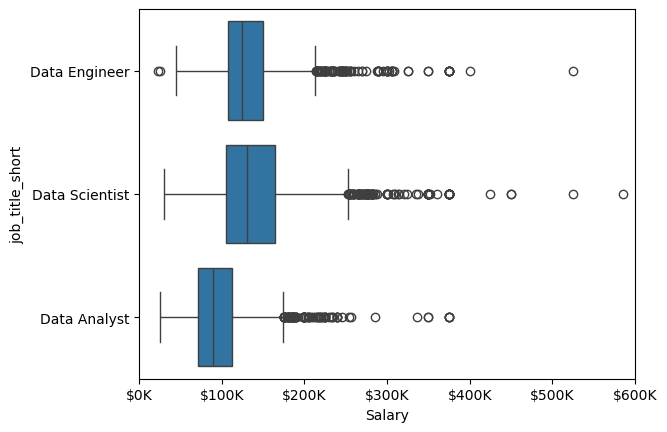

In [10]:
sns.boxplot(data= df_US, x='salary_year_avg', y='job_title_short')

plt.xlabel('Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [16]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset = 'salary_year_avg').copy()
top_companies= df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest().reset_index()

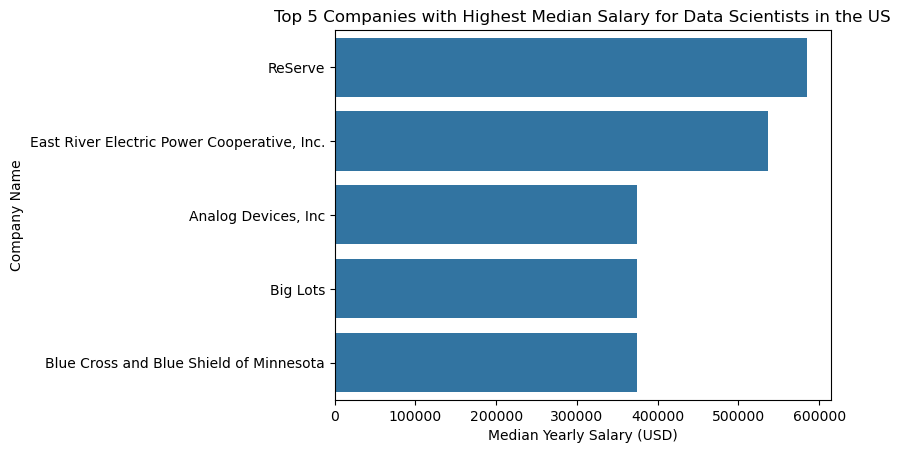

In [18]:
sns.barplot(data= top_companies, x= 'salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

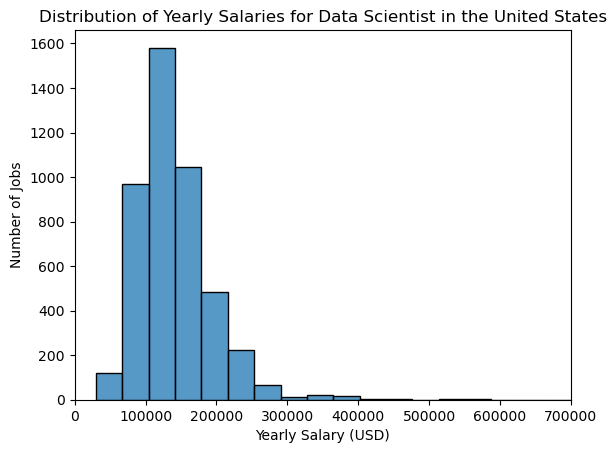

In [22]:
sns.histplot(data=df_DS_US['salary_year_avg'], kde =False, bins= 25)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

In [26]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles) ) & (df['job_country'] == 'India')].dropna(subset='salary_year_avg').copy()



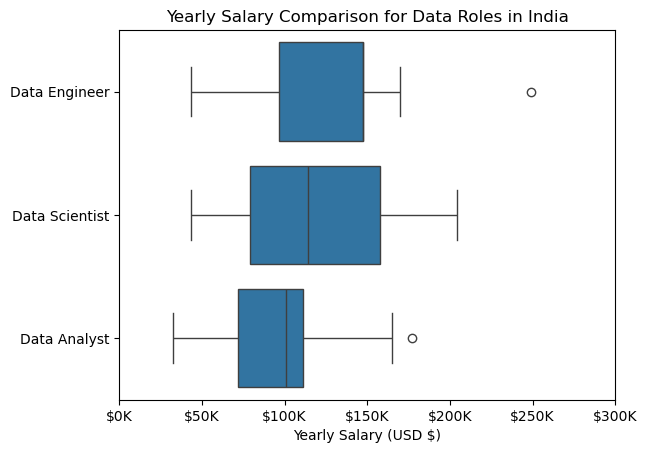

In [36]:
sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlim(0,300000)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:  f'${int(x/1000)}K'))
plt.xlabel('Yearly Salary (USD $)')
plt.ylabel("")
plt.show()

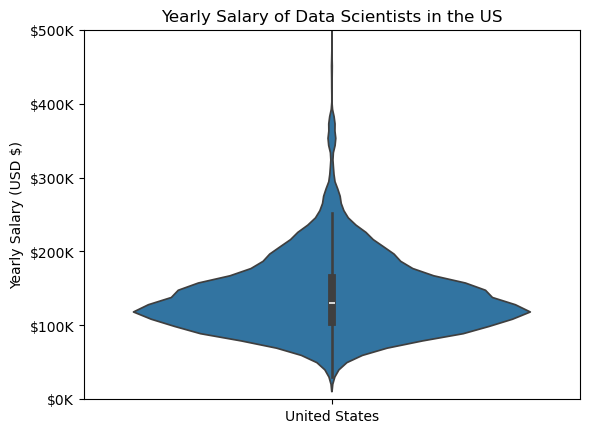

In [48]:
sns.violinplot(data=df_DS_US, x='job_country', y='salary_year_avg')
plt.ylim(0,500000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.ylabel('Yearly Salary (USD $)')
plt.xlabel('')
plt.title('Yearly Salary of Data Scientists in the US')
plt.show()